<a href="https://colab.research.google.com/github/Chockalingam-Palaniappan/Mini-Project/blob/main/Image_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install bing-image-downloader

In [16]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [17]:
from bing_image_downloader import downloader
downloader.download("cricket ball png",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.clker.com/cliparts/B/R/j/m/O/c/cricket-ball-hi.png
[%] File Downloaded !

[%] Downloading Image #2 from https://1.bp.blogspot.com/-f005LZGFppo/WKVaF6TEsOI/AAAAAAAAA5E/-rBf4A6WqXA0o1XbzcjH1VFzSMPeUvSigCLcB/w1200-h630-p-k-no-nu/dscs.png
[%] File Downloaded !

[%] Downloading Image #3 from https://pngimg.com/uploads/cricket/cricket_PNG10.png
[!] Issue getting: https://pngimg.com/uploads/cricket/cricket_PNG10.png
[!] Error:: HTTP Error 526: Origin SSL Certificate Error
[%] Downloading Image #3 from https://media.sportplan.net/viewer/movies/cricket/thumbs/CA000003.png
[%] File Downloaded !

[%] Downloading Image #4 from http://www.pngall.com/wp-content/uploads/2016/03/Roman-Reigns-Body-PNG.png
[%] File Downloaded !

[%] Downloading Image #5 from https://vignette.wikia.nocookie.net/object-filler/images/b/be/OFA_UNREGISTERED_HYPERCAM_2.png/revision/latest?cb=20190212010824
[%] File Downloaded 

In [18]:
from bing_image_downloader import downloader
downloader.download("vintage leather rugby ball",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://i.ebayimg.com/images/i/191644837032-0-1/s-l1000.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://a.1stdibscdn.com/original-vintage-leather-rugby-ball-with-6-panels-for-sale/1121189/f_161686811571203319261/16168681_master.jpg?width=768
[%] File Downloaded !

[%] Downloading Image #3 from https://www.john-woodbridge.com/1035-tm_thickbox_default/1940s-rugby-ball.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.asdiansi.com/old-rugbyball.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.colonialsoldier.com/img/1702-038.JPG
[%] File Downloaded !

[%] Downloading Image #6 from https://asdiansi.com/afl-7.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://img.bidorbuy.co.za/image/upload/v1482472257/user_images/485/790485/161223075016_IMG_0364.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://cdn.shopify.com/s/files/1/07

In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
 
DATADIR='/content/images'
CATEGORIES = ['cricket ball png','vintage leather rugby ball']
 
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
     
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3, 
                                                 random_state=100)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
accuracy_score(y_pred,y_test)

1.0

In [24]:
 confusion_matrix(y_pred,y_test)

array([[14,  0],
       [ 0,  9]])

In [25]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [26]:
model = pickle.load(open('img_model.p','rb'))

Enter your URL herehttps://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Cricketball.png/220px-Cricketball.png
(220, 220, 4)
 PREDICTED OUTPUT: CRICKET BALL


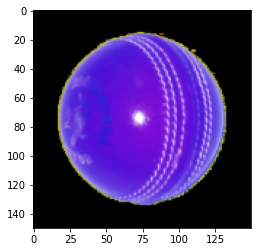

In [38]:
flat_data = []
url = input('Enter your URL here')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
if y_out in ["cricket ball png"]:
  print(f' PREDICTED OUTPUT: CRICKET BALL')
else:
  print(f' PREDICTED OUTPUT: RUGBY BALL')